rows in kt: 21


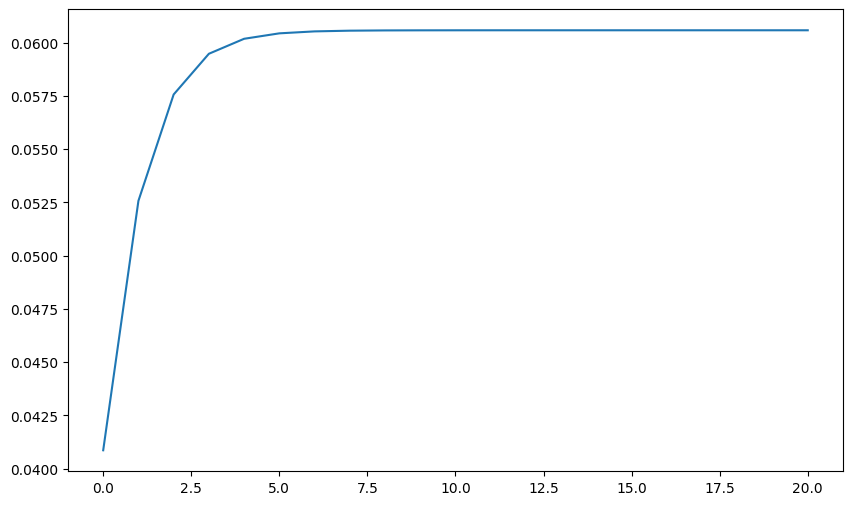

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

alpha = 0.36
beta = 0.40
n = 0.1
t0 = 20 

k = beta / (1+beta) * ((1-alpha) / (1+n) )**(1/(1-alpha))

k0 = k / 3

    
def kdyn(x):
    y = beta / (1+beta) * (1-alpha) / (1+n) * x**(alpha)
    return y



kt = []   
kt.append(k0)   


for i in range(int(t0)):
    k1 = kdyn(k0)
    kt.append(k1)
    k0=k1

print("rows in kt: " +str(len(kt)))
plt.plot(kt)
plt.show()

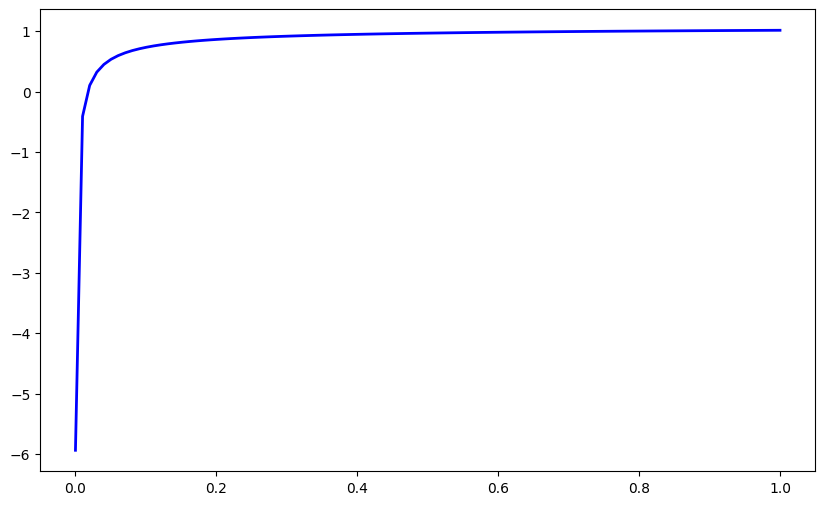

Minimum of ygrid: 0.10263743886548794
Index of Minimum: [0.02118182]
ksteady for initial guess: [0.10263744]
[0.01817586]
-4.423380603261444
[2.18577359e-14]
[0.00686501]
-5.102330327564181
Welfare effect in steady state from the introduction of a pension:
consumption equivalent change: -0.38428069240593954
0 0.006865010235175684
1 0.006865010235175574
2 0.006865010235175536
3 0.00896119061917856
4 0.014090568160498248
5 0.01658406950824048
6 0.017585942420046227
7 0.01796124679793523
8 0.018098308233020145
9 0.01814790597275773


/var/folders/rd/zs4xvzqn0qqds7psf6_1f74m0000gn/T/ipykernel_5051/3468584649.py:99: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  utilss = log(c1ss) + b*log(c2ss)-nu0*labor**(1+nu1)/(1+nu1)
/var/folders/rd/zs4xvzqn0qqds7psf6_1f74m0000gn/T/ipykernel_5051/3468584649.py:122: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  utilssd = log(c1ssd) + b*log(c2ssd)-nu0*labor**(1+nu1)/(1+nu1)
/var/folders/rd/zs4xvzqn0qqds7psf6_1f74m0000gn/T/ipykernel_5051/3468584649.py:142: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing thi

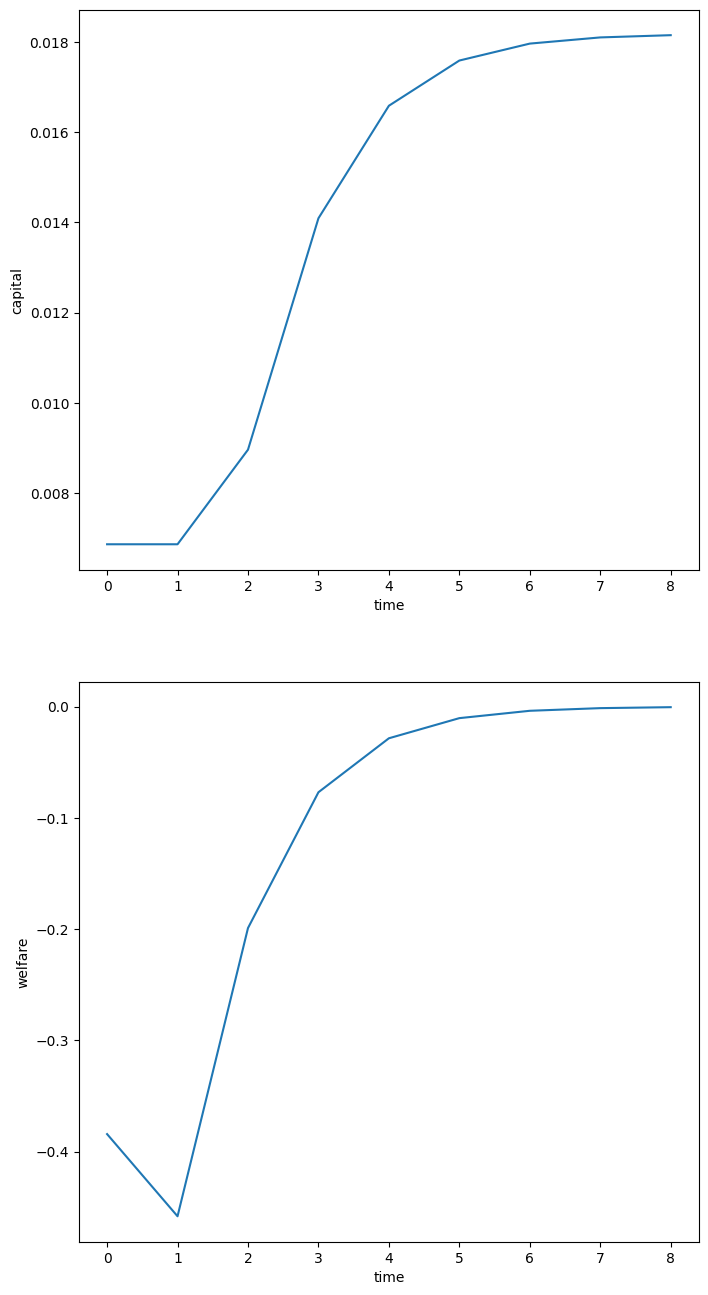

In [ ]:

import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = (10,6)
log = math.log
e = math.e

labor = 0.30    # constant labor supply
alpha = 0.36        # production elasticity of capital
b = 0.40        # discount factor
n = 0.10        # population growth rate
nu0 = 257.15    # disutility of labor
nu1 = 3.33      # inverse of Frisch elasticity
tau = (0, 0.30) # parameter values for pension replacement rate (tuple)
nt=10           # number of transition periods   
             

def wage(k,l):
    return (1-alpha) * k**alpha * l**(-alpha)


def interest_rate(k,l):
    return alpha * k**(alpha - 1) * l**(1-alpha)


def ksteady(k):
    w = wage(k,labor)           # wage
    r = interest_rate(k,labor)  # interest rate
    d = tau0 * w * labor        # pension

    y = (1+n)*k-w*labor*b/(1+b) + 1/(1+b)*(1+b+b*r+n)/(1+r)*d

    y= y/k
    return y


def kdyn(k1):
    w0 = wage(k0,labor)          # wage in t
    w1 = wage(k1,labor)          # wage in t+1
    r1 = interest_rate(k1,labor) # interest rate in t+1
    d1 = tau1 * w1 * labor        # pension in t+1
    y = (1+n)*k1 - (1-tau0)*w0*labor*b/(1+b) + 1/(1+b)*(1+n)/(1+r1) * d1
    return y
    

tau0 = tau[0]       # initial steady state: no pension  



kgrid = np.linspace(0.001, 1, 100)
ygrid = np.zeros(100)   # values of non-linear eq for k
for i in range(100):
    ygrid[i] = ksteady(kgrid[i])

plt.plot(kgrid, ygrid, 'b-', linewidth=2)
plt.show()

ygrid = abs(ygrid)
print("Minimum of ygrid: " + str(ygrid.min()))

i0 = np.where(ygrid == ygrid.min()) # find index of y with minimum
kguess = kgrid[i0]
print("Index of Minimum: " + str(kguess))
print("ksteady for initial guess: " + str(ksteady(kguess)))


kss = scipy.optimize.fsolve(ksteady, kguess)
print(str(kss))
wss = wage(kss,labor)
rss = interest_rate(kss, labor)
dss = tau0 * wss * labor
c1ss = 1/(1+b) * (wss*labor + (n-rss)/(1+rss)*dss)
c2ss = b*c1ss*(1+rss)
utilss = log(c1ss) + b*log(c2ss)-nu0*labor**(1+nu1)/(1+nu1)
print(utilss)



tau0 = tau[1]
# find new initial value
for i in range(100):
    ygrid[i] = ksteady(kgrid[i])

ygrid = abs(ygrid)

i0 = np.where(ygrid == ygrid.min()) # find index of y with minimum
kguess = kgrid[i0]
kssd = scipy.optimize.fsolve(ksteady, kguess)
print(ksteady(kssd))
print(str(kssd))
wssd = wage(kssd,labor)
rssd = interest_rate(kssd, labor)
dssd = tau0 * wssd * labor
c1ssd = 1/(1+b) * (wssd*labor + (n-rssd)/(1+rssd)*dssd)
c2ssd = b*c1ssd*(1+rssd)
utilssd = log(c1ssd) + b*log(c2ssd)-nu0*labor**(1+nu1)/(1+nu1)
print(utilssd)


cec = e**((utilssd-utilss)/(1+b) )-1

print("Welfare effect in steady state from the introduction of a pension:")
print("consumption equivalent change: " + str(cec))


kt = np.zeros(nt+1)     # time path for capital stok in periot t
utilt = np.zeros(nt)  # lifetime utility of generation born in t
periods = range(nt)   # range of period 0,..., nt
cect = np.zeros(nt)   # welfare effects, % of consumption

kt[0] = kssd            # initial value of capital stock in period 0
utilt[0] = utilssd
cect[0] = e**((utilt[0]-utilss)/(1+b) )-1

tau0 = 0.3    # tax rate at young age
tau1 = 0.3    # tax rate at old age


for i in periods:
    k0=kt[i]
    print(i,k0)
    if i==2: 
        tau1 = 0  # first generation still has to pay contributions 
    if i==3: 
        tau0 = 0  # first generation which does not have to pay contributions
	
    k1 = scipy.optimize.fsolve(kdyn, k0)
    kt[i+1] = k1
    
    w0 = wage(k0,labor)
    w1 = wage(k1,labor)
    r1 = interest_rate(k1, labor)
    d0 = tau0 * w0 * labor    
    d1 = tau1 * w1 * labor

    c1 = 1/(1+b)*(w0*labor-d0+d1*(1+n)/(1+r1))
    c2 = b * c1 * (1+r1)
    utilt[i] = log(c1) + b*log(c2) - nu0*labor**(1+nu1) / (1+nu1)
    cect[i] = e**((utilt[i]-utilss) / (1+b) ) -1
	
fig, axes = plt.subplots(2, 1, figsize=(8, 16))
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].plot(kt[1:nt])
axes[1].set_xlabel('time')
axes[1].set_ylabel('welfare')
axes[1].plot(cect[1:nt])
plt.show()

solution k and l in the final steady state without pensions: 
[0.01817586440831432, 0.3]
Calibration of nu0: 257.15383339746097
solution k and l in the initial steady state with pensions: 
[0.00674905 0.29493248]
welfare loss: -38.46581175728853 % of consumption
solution found? findkt(ksolution)==0?
4.7574791328663935e-14


/var/folders/rd/zs4xvzqn0qqds7psf6_1f74m0000gn/T/ipykernel_5051/3595007346.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kt[nt] = x
/var/folders/rd/zs4xvzqn0qqds7psf6_1f74m0000gn/T/ipykernel_5051/3595007346.py:116: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labort[nt] = l0     # labor supply in last period of transition


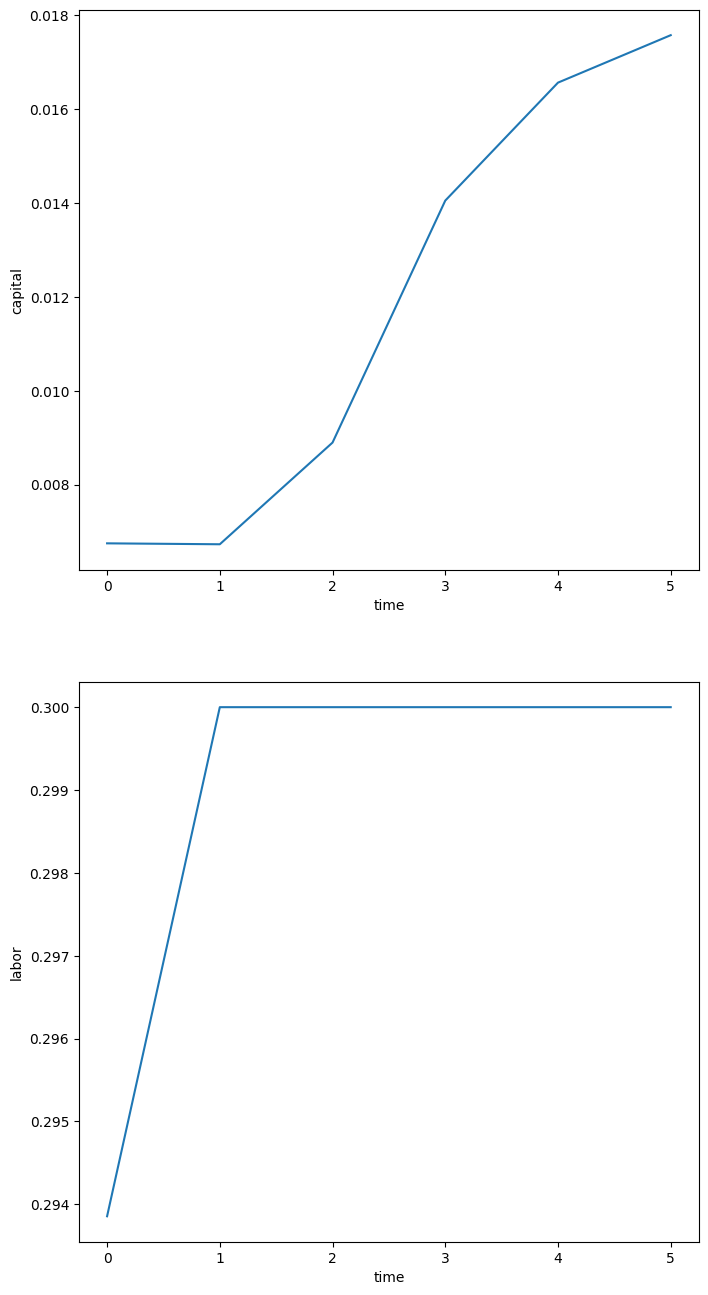

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  9 10:43:17 2020

@author: heerburk

Ch6_social_security2.py

Chapter 6.3., Public Economics (2019) by Burkhard Heer

computes the allocation and welfare effects of a
PAYG pension in a simple 2-period OLG model with ELASTIC labor

New computational problems:
    
    1. REVERSE SHOOTING: Solution of a Two-Point Boundary Value Problem,
        First-order non-linear difference eq. in 2 variables
        
    2. Nested use of fsolve

"""
# part 1: import libraries
import scipy.optimize 
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = (10,6)
log = math.log
e = math.e

# part 2: parameterization
lss = 0.30      # labor supply in initial steady state (calibration of nu0)
alpha = 0.36        # production elasticity of capital
b = 0.40        # discount factor
n = 0.10        # population growth rate
nu1 = 3.33      # inverse of Frisch elasticity
tau = (0, 0.30) # parameter values for pension replacement rate (tuple)
nt=5            # number of transition periods   
             
# part 3: definition of the functions
#
# wage function
def wage(k,l):
    return (1-alpha) * k**alpha * l**(-alpha)

# interest rate function
def interest_rate(k,l):
    return alpha * k**(alpha - 1) * l**(1-alpha)

# steady state computation
# input: guess for k
# output: steady-state condition (=0 in steady state)
def ksteady(x):
    k = x[0]
    labor = x[1]
    # initialization of the return function
    y = np.zeros(2) 
    w = wage(k,labor)           # wage
    r = interest_rate(k,labor)  # interest rate
    d = tau0 * w * labor        # pension
    # non-linear equations (6.28) and (6.30) in Heer (2019)
    y[0] = (1+n)*k - (1-tau0)*w*labor*b/(1+b) + 1/(1+b)*(1+n)/(1+r)*d
    y[1] = (1-tau0)*w - nu0*labor**nu1 /(1+b)*((1-tau0)*w*labor+(1-n)/(1+r)*d)
    return y


# kdyn(x)
# procedure that computes [k_t,l_t] given [k_t+1,l_t+1]
# solution to the non-linear eqs (6.28) and (6.30) in Heer (2019)
# input: guess x0 = [k_t,l_t
# output: the value of the equilibrium condition
def kdyn(x0,k1,l1,tau0,tau1):
    y = np.zeros(2)
    k0 = x0[0]   
    l0 = x0[1]
    r1 = interest_rate(k1,l1)
    w0 = wage(k0,l0)
    w1 = wage(k1,l1)
    d1 = tau1*w1*l1
    y[0] = k1*(1+n)-b/(1+b)*(1-tau0)*w0*l0+1/(1+b)*(1+n)/(1+r1)*d1
    y[1] = (1-tau0)*w0-nu0*l0**nu1/(1+b)*( (1-tau0)*w0*l0 + (1+n)/(1+r1)*d1 )
    return y

# findl(x)
# computes the optimal labor supply l_t from the foc (6.28)
def findl(l0,k0,k1,l1,tau0,tau1):
    w0 = wage(k0,l0)
    w1 = wage(k1,l1)
    r1 = interest_rate(k1, l1)
    d1 = tau1 * w1 * l1
    y = (1-tau0)*w0 - nu0*l0**nu1 / (1+b)*( (1-tau0)*w0*l0 + (1+n)/(1+r1)*d1 )
    return y

# findkt(x)
# computes k_0 by iterating backwards over (6.28) and (6.30)
# given a guess for k_T in the final period of the transition
# and compares the imputed value of k_0 with the value in the initial 
# steady state
# input: k_T
# output: k_0 - kssp
#
def findkt(x):
# value of k  in the last period; afterwards k is equal to kss
    kt[nt] = x	
    # we need to find labort[nt]	
    # the optimal labor supply follows from the first-order condition of labor 
    tau0 = tau[0]
    tau1 = tau[0]
    k0 = x
    k1 = kss
    l1 = lss
    # notice that fsolve also allows for the pass-on of additional
    # arguments 'args' which helps to avoid use of globals in the
    # function findl 
    l0 = scipy.optimize.fsolve(findl, lss, args=(k0,k1,l1,tau0,tau1))
    labort[nt] = l0     # labor supply in last period of transition

    for i in  range(nt,0,-1):
		# i=0: Period 0 with steady state, tau=30% for young and old
		# i=1: Period 1, young generation still has to finance old agents 
        # tau0=30% so that d_1=tau_1 w_1 l, but will not receive
		# a pension in old age in period 2 (i=3) with tau1=0% so that d_2=0
        if i==1:
            tau1 = tau[1]
        if i==2: 
            tau0 = tau[1]
		
        k1 = kt[i]
        l1 = labort[i]
        # x0 = [k1,l1]        
        # print(kdyn(x0,k1,l1,tau0,tau1))
        # y0 = kdyn([k1,l1],k1,l1,tau0,tau1)
        
        # notice that fsolve also allows for the pass-on of additional
        # arguments 'args' which helps to avoid use of globals in the
        # function findkt 
        y0 = scipy.optimize.fsolve(kdyn, [k1,l1], args=(k1,l1,tau0,tau1))
        kt[i-1] = y0[0]
        labort[i-1] = y0[1]
    
    return kt[0]-kssp

    
# part 4: main program

# 4.1 Calibration of the initial steady state: parameter nu0
tau0 = tau[0]       # initial steady state: no pension  
kss = ( b/(1+b) * (1-alpha) / (1+n)  )**(1/(1-alpha)) * lss
wss = wage(kss,lss)
rss = interest_rate(kss,lss)
c1ss = 1/(1+b)*wss*lss
nu0 = wss / ( lss**nu1 * c1ss) 
c2ss = b*(1+rss)*c1ss
utilss = log(c1ss) + b*log(c2ss) - nu0*lss**(1+nu1) / (1+nu1)
print("solution k and l in the final steady state without pensions: ")
print([kss,lss])
print("Calibration of nu0: " + str(nu0))

# test if steady-conditions are specified correctly (=0)
#x = [kss, lss]
#y = ksteady(x)
#print(y)

# 4.2 computation of the final steady state with PAYG pension
tau0 = tau[1]
# steady state with pensions
x = scipy.optimize.fsolve(ksteady, [kss,lss])
kssp = x[0]
lssp = x[1]
print("solution k and l in the initial steady state with pensions: ")
print(x)
# new steady state values of w, r, c1 and c2
wssp = wage(kssp,lssp)
rssp = interest_rate(kssp,lssp)
c1ssp = 1/(1+b) * ( (1-tau0)*wssp*lssp+(1+n)/(1+rssp)*tau0*wssp*lssp )
c2ssp = b * (1+rssp) * c1ssp
utilssp = log(c1ssp) + b * log(c2ssp) - nu0*lssp**(1+nu1) / (1+nu1)
# consumption equivalent change in steady state
cec = e**( (utilssp-utilss)/(1+b) ) - 1
print("welfare loss: " +str(100*cec) + " % of consumption")

# 4.3 computation of the dynamics: Reverse Shooting
kt = np.zeros(nt+1)
labort = np.zeros(nt+1)
periods = np.linspace(0,nt,nt+1)


# initial guess for k_nt in final period of transition
kinit = 0.999*kss

# test if kdyn and findl work fine
# test kdyn == 0 ?
#print(kdyn([kinit,lss],kss,lss,tau[0],tau[0]))
# test findl == 0?
#print(findl(lss, kinit, kss, lss, tau[0], tau[1]))
#print("test findkt(x)")
#y = findkt(kinit)
#print(y)

ksolution = scipy.optimize.fsolve(findkt, kinit)

print("solution found? findkt(ksolution)==0?")
print(findkt(ksolution))

fig, axes = plt.subplots(2, 1, figsize=(8, 16))
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].plot(kt)
axes[1].set_xlabel('time')
axes[1].set_ylabel('labor')
axes[1].plot(labort)
plt.show()      

